In [88]:
#project Stucture
'''
predictive_maintenance/
├── app/
│   └── app.py                  (Streamlit app here)
├── models/
│   ├── rf_model.pkl            Trained Random Forest model
│   └── scaler.pkl             (Optional: only if used)
│   └── feature_list.txt        List of features used by model
├── data/
│   └── processed_train_FD001.csv
├── notebooks/
│   └── eda.ipynb, model_training.ipynb

'''

'\npredictive_maintenance/\n├── app/\n│   └── app.py                  (Streamlit app here)\n├── models/\n│   ├── rf_model.pkl            Trained Random Forest model\n│   └── scaler.pkl             (Optional: only if used)\n│   └── feature_list.txt        List of features used by model\n├── data/\n│   └── processed_train_FD001.csv\n├── notebooks/\n│   └── eda.ipynb, model_training.ipynb\n\n'

In [89]:
import pandas as pd

# Define columns
cols = ['unit_number', 'time_in_cycles', 'op_setting_1', 'op_setting_2', 'op_setting_3'] + \
       [f'sensor_{i}' for i in range(1, 22)]

# Load training data
df = pd.read_csv('../data/train_FD001.txt', sep=' ', header=None)
df.drop(columns=[26, 27], inplace=True)  # Last 2 columns are empty
df.columns = cols

df.head()


,unit_number,time_in_cycles,op_setting_1,op_setting_2,op_setting_3,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,...,sensor_12,sensor_13,sensor_14,sensor_15,sensor_16,sensor_17,sensor_18,sensor_19,sensor_20,sensor_21
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,521.66,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,522.28,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,522.42,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,522.86,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,522.19,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044


In [90]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20631 entries, 0 to 20630
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   unit_number     20631 non-null  int64  
 1   time_in_cycles  20631 non-null  int64  
 2   op_setting_1    20631 non-null  float64
 3   op_setting_2    20631 non-null  float64
 4   op_setting_3    20631 non-null  float64
 5   sensor_1        20631 non-null  float64
 6   sensor_2        20631 non-null  float64
 7   sensor_3        20631 non-null  float64
 8   sensor_4        20631 non-null  float64
 9   sensor_5        20631 non-null  float64
 10  sensor_6        20631 non-null  float64
 11  sensor_7        20631 non-null  float64
 12  sensor_8        20631 non-null  float64
 13  sensor_9        20631 non-null  float64
 14  sensor_10       20631 non-null  float64
 15  sensor_11       20631 non-null  float64
 16  sensor_12       20631 non-null  float64
 17  sensor_13       20631 non-null 

,unit_number,time_in_cycles,op_setting_1,op_setting_2,op_setting_3,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,...,sensor_12,sensor_13,sensor_14,sensor_15,sensor_16,sensor_17,sensor_18,sensor_19,sensor_20,sensor_21
count,20631.000000,20631.000000,20631.000000,20631.000000,20631.0,20631.00,20631.000000,20631.000000,20631.000000,2.063100e+04,...,20631.000000,20631.000000,20631.000000,20631.000000,2.063100e+04,20631.000000,20631.0,20631.0,20631.000000,20631.000000
mean,51.506568,108.807862,-0.000009,0.000002,100.0,518.67,642.680934,1590.523119,1408.933782,1.462000e+01,...,521.413470,2388.096152,8143.752722,8.442146,3.000000e-02,393.210654,2388.0,100.0,38.816271,23.289705
std,29.227633,68.880990,0.002187,0.000293,0.0,0.00,0.500053,6.131150,9.000605,1.776400e-15,...,0.737553,0.071919,19.076176,0.037505,1.387812e-17,1.548763,0.0,0.0,0.180746,0.108251
min,1.000000,1.000000,-0.008700,-0.000600,100.0,518.67,641.210000,1571.040000,1382.250000,1.462000e+01,...,518.690000,2387.880000,8099.940000,8.324900,3.000000e-02,388.000000,2388.0,100.0,38.140000,22.894200
25%,26.000000,52.000000,-0.001500,-0.000200,100.0,518.67,642.325000,1586.260000,1402.360000,1.462000e+01,...,520.960000,2388.040000,8133.245000,8.414900,3.000000e-02,392.000000,2388.0,100.0,38.700000,23.221800
50%,52.000000,104.000000,0.000000,0.000000,100.0,518.67,642.640000,1590.100000,1408.040000,1.462000e+01,...,521.480000,2388.090000,8140.540000,8.438900,3.000000e-02,393.000000,2388.0,100.0,38.830000,23.297900
75%,77.000000,156.000000,0.001500,0.000300,100.0,518.67,643.000000,1594.380000,1414.555000,1.462000e+01,...,521.950000,2388.140000,8148.310000,8.465600,3.000000e-02,394.000000,2388.0,100.0,38.950000,23.366800
max,100.000000,362.000000,0.008700,0.000600,100.0,518.67,644.530000,1616.910000,1441.490000,1.462000e+01,...,523.380000,2388.560000,8293.720000,8.584800,3.000000e-02,400.000000,2388.0,100.0,39.430000,23.618400


In [91]:
print("Total engines:", df['unit_number'].nunique())
print("Max cycles per engine:", df.groupby('unit_number')['time_in_cycles'].max().max())
print(df.columns)

Total engines: 100
Max cycles per engine: 362
Index(['unit_number', 'time_in_cycles', 'op_setting_1', 'op_setting_2',
       'op_setting_3', 'sensor_1', 'sensor_2', 'sensor_3', 'sensor_4',
       'sensor_5', 'sensor_6', 'sensor_7', 'sensor_8', 'sensor_9', 'sensor_10',
       'sensor_11', 'sensor_12', 'sensor_13', 'sensor_14', 'sensor_15',
       'sensor_16', 'sensor_17', 'sensor_18', 'sensor_19', 'sensor_20',
       'sensor_21'],
      dtype='object')


     unit_number  time_in_cycles  op_setting_1  op_setting_2  op_setting_3  \
0              1               1       -0.0007       -0.0004         100.0   
1              1               2        0.0019       -0.0003         100.0   
2              1               3       -0.0043        0.0003         100.0   
3              1               4        0.0007        0.0000         100.0   
4              1               5       -0.0019       -0.0002         100.0   
..           ...             ...           ...           ...           ...   
187            1             188       -0.0067        0.0003         100.0   
188            1             189       -0.0006        0.0002         100.0   
189            1             190       -0.0027        0.0001         100.0   
190            1             191       -0.0000       -0.0004         100.0   
191            1             192        0.0009       -0.0000         100.0   

     sensor_1  sensor_2  sensor_3  sensor_4  sensor_5  ...  sen

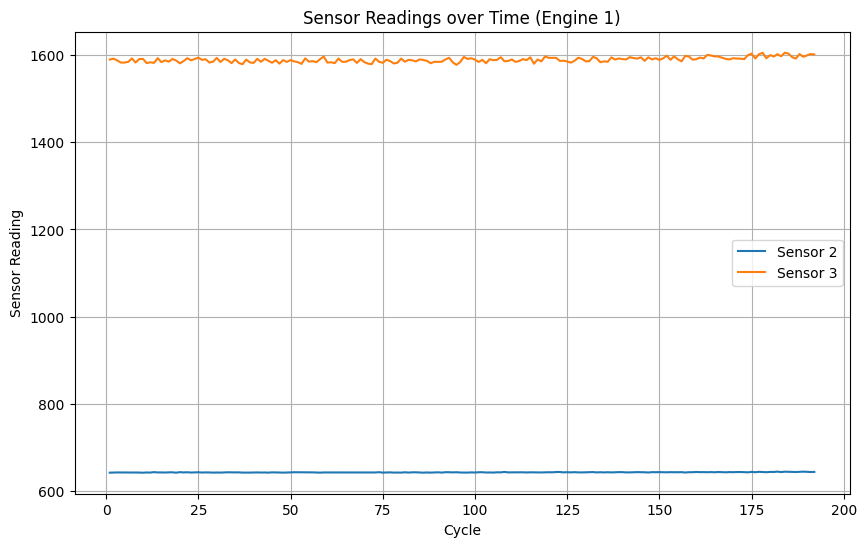

In [92]:
import matplotlib.pyplot as plt

engine_1 = df[df['unit_number'] == 1]
plt.figure(figsize=(10, 6))
print(engine_1)
plt.plot(engine_1['time_in_cycles'], engine_1['sensor_2'], label='Sensor 2')
plt.plot(engine_1['time_in_cycles'], engine_1['sensor_3'], label='Sensor 3')
plt.xlabel("Cycle")
plt.ylabel("Sensor Reading")
plt.title("Sensor Readings over Time (Engine 1)")
plt.legend()
plt.grid(True)
plt.show()


In [93]:

# Get all sensor columns
sensor_cols = [col for col in df.columns if col.startswith('sensor_')]

# Find sensors with zero variance (i.e., same value in every row)
constant_sensors = [col for col in sensor_cols if df[col].nunique() == 1]

print("Constant (useless) sensors:", constant_sensors)
# Drop constant sensors
df.drop(columns=constant_sensors, inplace=True)

print(" After dropping constant sensors, shape:", df.shape)

Constant (useless) sensors: ['sensor_1', 'sensor_5', 'sensor_10', 'sensor_16', 'sensor_18', 'sensor_19']
 After dropping constant sensors, shape: (20631, 20)


In [94]:
# RUL = max(cycle) - current_cycle per engine
#rul_df1 = df.groupby('unit_number')['time_in_cycles'].max()
#print(rul_df1)

rul_df = df.groupby('unit_number')['time_in_cycles'].max().reset_index()
rul_df.columns = ['unit_number', 'max_cycle']
#print(rul_df)
#print(df.columns)
df = df.merge(rul_df, on='unit_number')

df['RUL'] = df['max_cycle'] - df['time_in_cycles']
print(df.columns)
df.drop(columns=['max_cycle'], inplace=True)

df[['unit_number', 'time_in_cycles', 'RUL']].head(10)

Index(['unit_number', 'time_in_cycles', 'op_setting_1', 'op_setting_2',
       'op_setting_3', 'sensor_2', 'sensor_3', 'sensor_4', 'sensor_6',
       'sensor_7', 'sensor_8', 'sensor_9', 'sensor_11', 'sensor_12',
       'sensor_13', 'sensor_14', 'sensor_15', 'sensor_17', 'sensor_20',
       'sensor_21', 'max_cycle', 'RUL'],
      dtype='object')


,unit_number,time_in_cycles,RUL
0,1,1,191
1,1,2,190
2,1,3,189
3,1,4,188
4,1,5,187
5,1,6,186
6,1,7,185
7,1,8,184
8,1,9,183
9,1,10,182


In [95]:
# Save the dataframe with RUL to a CSV file
#df.to_csv('../data/processed_train_FD001.csv', index=False)
#print(" Data with RUL saved to: ../data/processed_train_FD001.csv")
#import pandas as pd
#df = pd.read_csv('../data/processed_train_FD001.csv')

df.head()


,unit_number,time_in_cycles,op_setting_1,op_setting_2,op_setting_3,sensor_2,sensor_3,sensor_4,sensor_6,sensor_7,...,sensor_9,sensor_11,sensor_12,sensor_13,sensor_14,sensor_15,sensor_17,sensor_20,sensor_21,RUL
0,1,1,-0.0007,-0.0004,100.0,641.82,1589.70,1400.60,21.61,554.36,...,9046.19,47.47,521.66,2388.02,8138.62,8.4195,392,39.06,23.4190,191
1,1,2,0.0019,-0.0003,100.0,642.15,1591.82,1403.14,21.61,553.75,...,9044.07,47.49,522.28,2388.07,8131.49,8.4318,392,39.00,23.4236,190
2,1,3,-0.0043,0.0003,100.0,642.35,1587.99,1404.20,21.61,554.26,...,9052.94,47.27,522.42,2388.03,8133.23,8.4178,390,38.95,23.3442,189
3,1,4,0.0007,0.0000,100.0,642.35,1582.79,1401.87,21.61,554.45,...,9049.48,47.13,522.86,2388.08,8133.83,8.3682,392,38.88,23.3739,188
4,1,5,-0.0019,-0.0002,100.0,642.37,1582.85,1406.22,21.61,554.00,...,9055.15,47.28,522.19,2388.04,8133.80,8.4294,393,38.90,23.4044,187


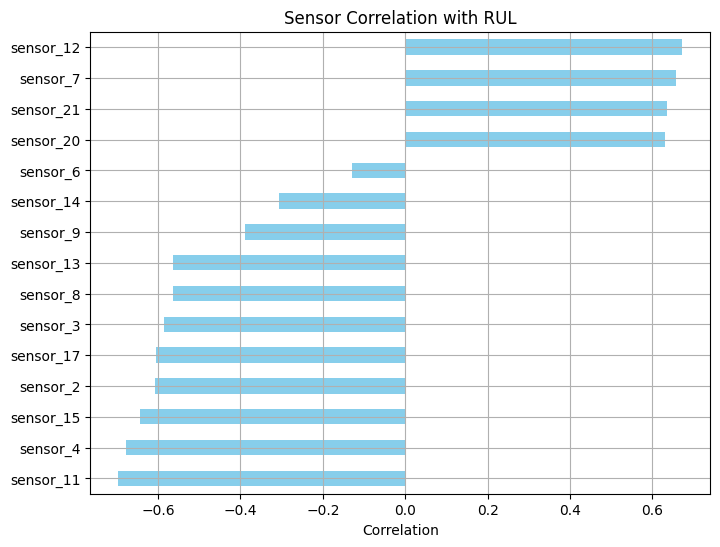

In [96]:
import seaborn as sns
import matplotlib.pyplot as plt

sensor_cols = [col for col in df.columns if 'sensor_' in col]

# Correlation with RUL
corr_with_rul = df[sensor_cols + ['RUL']].corr()['RUL'].drop('RUL').sort_values()

plt.figure(figsize=(8, 6))
corr_with_rul.plot(kind='barh', color='skyblue')
plt.title('Sensor Correlation with RUL')
plt.xlabel('Correlation')
plt.grid()
plt.show()


In [97]:
#Drop sensors with very low correlation (e.g. between -0.1 and 0.1):

low_corr_sensors = corr_with_rul[abs(corr_with_rul) < 0.1].index.tolist()
df.drop(columns=low_corr_sensors, inplace=True)
df.head()

,unit_number,time_in_cycles,op_setting_1,op_setting_2,op_setting_3,sensor_2,sensor_3,sensor_4,sensor_6,sensor_7,...,sensor_9,sensor_11,sensor_12,sensor_13,sensor_14,sensor_15,sensor_17,sensor_20,sensor_21,RUL
0,1,1,-0.0007,-0.0004,100.0,641.82,1589.70,1400.60,21.61,554.36,...,9046.19,47.47,521.66,2388.02,8138.62,8.4195,392,39.06,23.4190,191
1,1,2,0.0019,-0.0003,100.0,642.15,1591.82,1403.14,21.61,553.75,...,9044.07,47.49,522.28,2388.07,8131.49,8.4318,392,39.00,23.4236,190
2,1,3,-0.0043,0.0003,100.0,642.35,1587.99,1404.20,21.61,554.26,...,9052.94,47.27,522.42,2388.03,8133.23,8.4178,390,38.95,23.3442,189
3,1,4,0.0007,0.0000,100.0,642.35,1582.79,1401.87,21.61,554.45,...,9049.48,47.13,522.86,2388.08,8133.83,8.3682,392,38.88,23.3739,188
4,1,5,-0.0019,-0.0002,100.0,642.37,1582.85,1406.22,21.61,554.00,...,9055.15,47.28,522.19,2388.04,8133.80,8.4294,393,38.90,23.4044,187


In [98]:
#Normalize (Min-Max or Standard Scaling)
#Normalize sensor values so models aren’t biased by magnitude.

from sklearn.preprocessing import MinMaxScaler

features = [col for col in df.columns if col.startswith('sensor_') or col.startswith('op_setting')]
scaler = MinMaxScaler()

df[features] = scaler.fit_transform(df[features])

In [99]:
#Create Trend-Based Features (Rolling Windows)
#We can create powerful time-series features for each engine using rolling statistics:

# Example: Create rolling mean & std for sensor_2 and sensor_3
rolling_features = ['sensor_2', 'sensor_3']
window_size = 5

for sensor in rolling_features:
    df[f'{sensor}_roll_mean'] = df.groupby('unit_number')[sensor].rolling(window_size).mean().reset_index(drop=True)
    df[f'{sensor}_roll_std'] = df.groupby('unit_number')[sensor].rolling(window_size).std().reset_index(drop=True)

#df.fillna(method='bfill', inplace=True)    # fill missing values at beginning
df.bfill(inplace=True)


In [100]:
# Final list of features (everything except unit_number and RUL)
X_cols = [col for col in df.columns if col not in ['unit_number', 'time_in_cycles', 'RUL']]
X = df[X_cols]
y = df['RUL']

df.to_csv('../data/final_train_FD001.csv', index=False)
print(" Cleaned feature set saved.")


 Cleaned feature set saved.


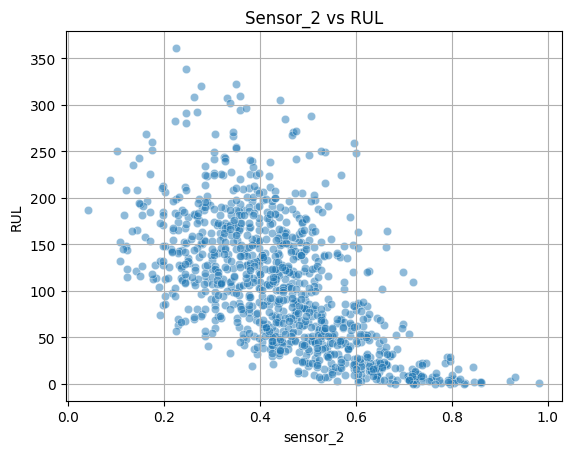

In [101]:
#Plot RUL vs. Sensor after Scaling

import seaborn as sns
sns.scatterplot(x='sensor_2', y='RUL', data=df.sample(1000), alpha=0.5)
plt.title("Sensor_2 vs RUL")
plt.grid(True)


Model Training and Evaluation - in model_training.ipynb 
